In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<Figure size 149760x149760 with 0 Axes>

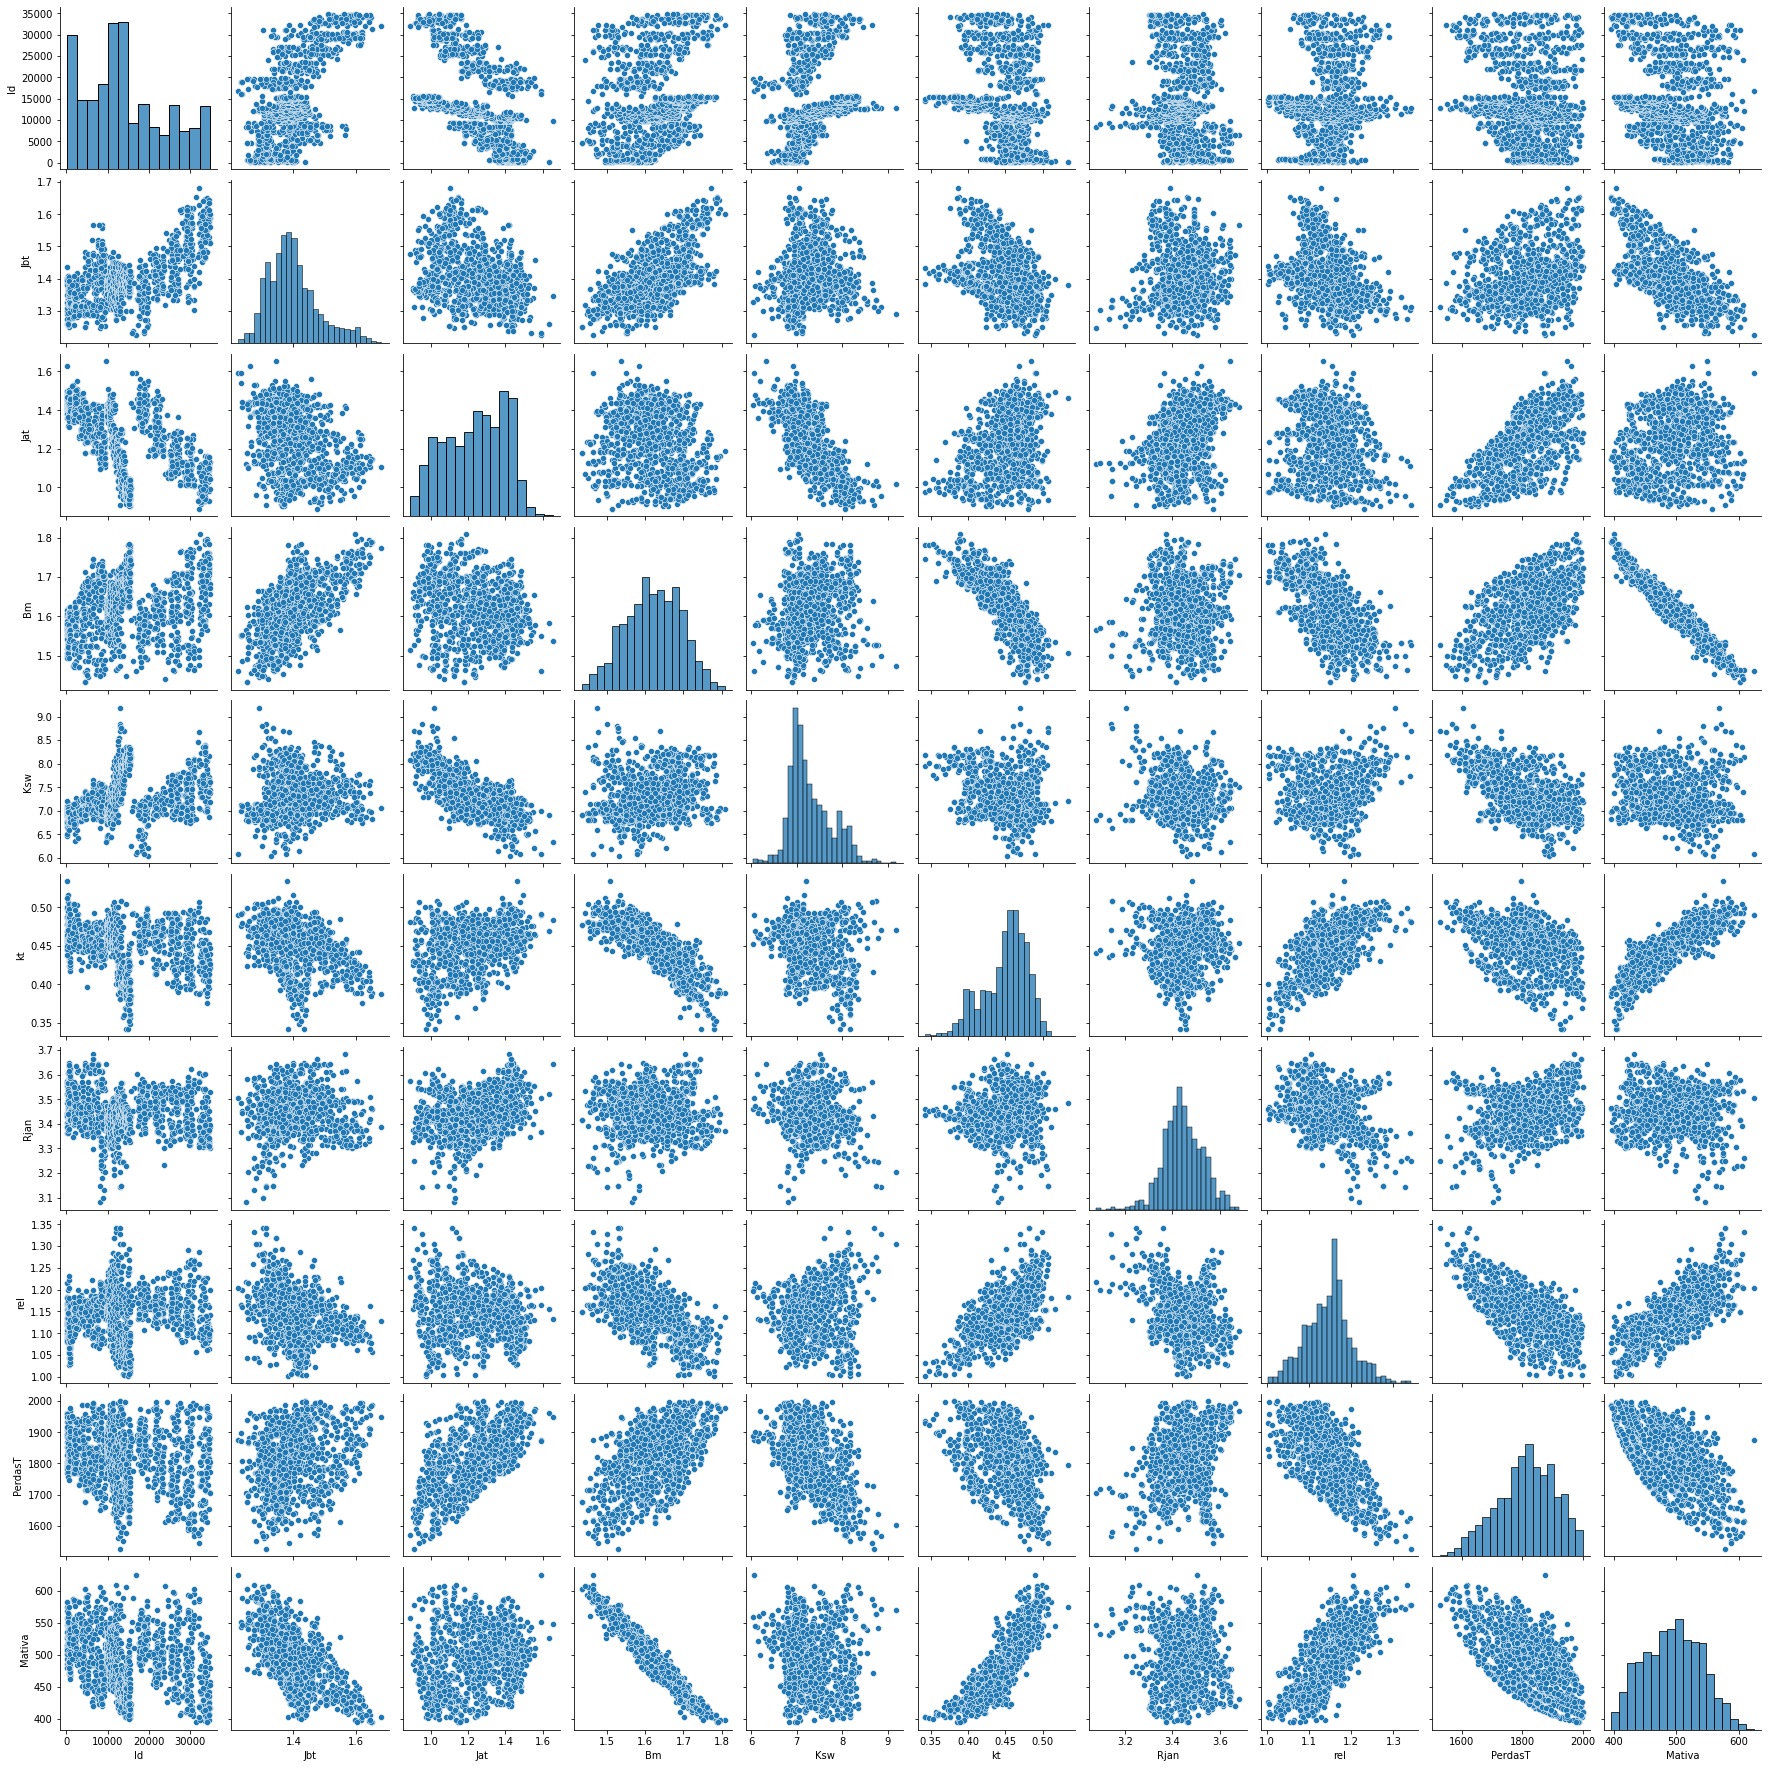

In [68]:
file_name = "individuos.xlsx"
table = pd.read_excel(file_name, index_col=0)
# print(table)

# plt.figure()
# sns.heatmap(table.corr(), annot=True, cmap="Wistia")
# print(dir(table.index))
table.index = list(range(len(table.index)))
plt.figure(figsize=(2080, 2080))
sns.pairplot(table)
plt.savefig("salvo.png")
# plt.show()

In [41]:
from sklearn.model_selection import train_test_split

y_m_ativa = table["Mativa"]
y_p_totais = table["PerdasT"]

x = table.drop(["Mativa", "PerdasT"], axis=1)

x_train, x_test, y_m_ativa_train, y_m_ativa_test, y_p_totais_train, y_p_totais_test = train_test_split(x, y_m_ativa, y_p_totais)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressao = LinearRegression()
random_florest = RandomForestRegressor()

regressao.fit(x_train, y_p_totais_train)
random_florest.fit(x_train, y_p_totais_train)


RandomForestRegressor()

In [65]:
previsao_regressao = regressao.predict(x_test)
previsao_random_florest = random_florest.predict(x_test)

print("Paara a regressao: ", metrics.r2_score(y_m_ativa_test, previsao_regressao))
print("Paara a random florest: ", metrics.r2_score(y_m_ativa_test, previsao_random_florest))

Paara a regressao:  -818.4841007256464
Paara a random florest:  -816.9950092728237


<AxesSubplot:>

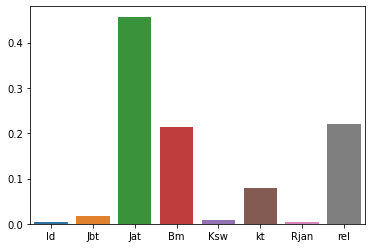

In [66]:
sns.barplot(x=x_train.columns, y=random_florest.feature_importances_)
